In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pickle
#%matplotlib inline
#%pylab inline
#pylab.rcParams['figure.figsize'] = (7.0, 5.0)
import scipy.stats as sc
import ipywidgets as wg
from IPython.display import HTML, display

# Correlation time

In [2]:
def uncorr_err(Lx_err, Lx_tau):
    Lx_max_tau = []
    for i,taus in enumerate(Lx_tau):
        max_tau = np.nanmax(taus)
        x_max_tau = np.tile(max_tau, len(taus))
        Lx_max_tau.append(x_max_tau)
    Lx_terr = np.sqrt((1+2*np.array(Lx_max_tau))*np.array(Lx_err))
    #Lx_terr = np.sqrt((1+2*np.array(Lx_tau))*np.array(Lx_err))
    return(Lx_terr)

In [3]:
CorrData = pickle.load(open('2DcorrData.p', 'rb'))
possibleScales = CorrData['possibleScales']; temperatures = CorrData['temperatures']
LcorrEdata = CorrData['LcorrEdata']; LtauEdata = CorrData['LtauEdata']
LcorrMdata = CorrData['LcorrMdata']; LtauMdata = CorrData['LtauMdata']
Lcorr_nng_data = CorrData['Lcorr_nng_data']; Ltau_nng_data = CorrData['Ltau_nng_data']
Lcorr_alm_data = CorrData['Lcorr_alm_data']; Ltau_alm_data = CorrData['Ltau_alm_data']

In [4]:
tauData = [['','MAXtauE', 'MAXtauM', 'MAXtau_nng', 'MAXtau_alm']]

for i,L in enumerate(possibleScales):
    row = []
    tauE = round(max(LtauEdata[i]),3); tauM = round(max(LtauMdata[i]),3); tau_nng = round(max(Ltau_nng_data[i]),3)
    tau_alm = round(max(Ltau_alm_data[i]),3)
    j = np.argmax(LtauEdata[i]); k = np.argmax(LtauMdata[i]); l = np.argmax(Ltau_nng_data[i]); m = np.argmax(Ltau_alm_data[i])
    T1 = temperatures[j]; T2 = temperatures[k]; T3 = temperatures[l]; T4 = temperatures[m]
    row.append('L = %d'%(L)); row.append('%.1f (T=%.2f)'%(tauE,T1)); row.append('%.1f (T=%.2f)'%(tauM,T2))
    row.append('%.1f (T=%.2f)'%(tau_nng,T3)); row.append('%.1f (T=%.2f)'%(tau_alm,T4))
    tauData.append(row)
    
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in tauData)
       )
))

,MAXtauE,MAXtauM,MAXtau_nng,MAXtau_alm
L = 8,9.1 (T=5.70),4.3 (T=7.23),8.2 (T=8.00),3.9 (T=7.23)
L = 16,35.1 (T=5.70),20.0 (T=8.00),33.8 (T=5.00),2.4 (T=8.00)
L = 28,68.8 (T=7.23),61.0 (T=8.00),65.1 (T=4.58),1.6 (T=3.30)
L = 32,113.5 (T=5.70),70.5 (T=8.00),114.5 (T=8.00),1.4 (T=2.26)


-1.9149223247865481
L = 28


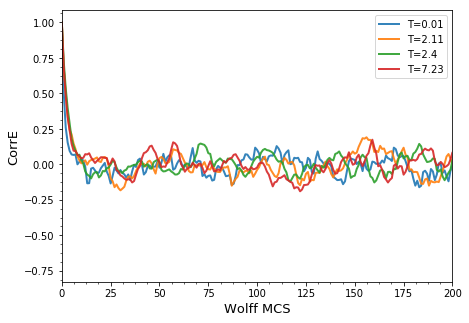

In [5]:
save = False

fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(1,1,1)
t = np.arange(len(LcorrEdata[0][0]))
i = 2 # index of scales
k = 0 # index of temperature
step = 11

for j, item in enumerate(temperatures[::step]):
    if j == j:
        ax1.plot(t,LcorrEdata[i][j+step], linewidth=2, label=('T={}'.format(np.around(item,2))), alpha=0.9)

    
ax1.set_xlabel('Wolff MCS',fontsize=13); ax1.set_ylabel('CorrE', fontsize=13)
ax1.legend()
ax1.set_xlim([0,200])
ax1.minorticks_on()
ymin, ymax = ax1.get_ylim()
print(ymin-ymax)

print('L = %d'%(possibleScales[i]))
#print('Correlation time (decay length) of the energy(nng):', LtauE[i])
#print('Correlation time (decay length) of the magnetization:', LtauM[i])


# Energy function

##### Energy ~ Number of Nodes

In [6]:
Ldata = pickle.load(open('2Dfinite_size_scaling_data.p', 'rb'))
Len_data = Ldata['Len_data']; Len_err = Ldata['Len_err']; Lnng_data = Ldata['Lnng_data']; Lnng_err = Ldata['Lnng_err']
L_CvEdata = Ldata['L_CvEdata']; L_Cv_nng_data = Ldata['L_Cv_nng_data']; temperatures = Ldata['temperatures']
scales = Ldata['scales']; t_prod = Ldata['t_prod']

#Lnng_data = np.array(Lnng_data); substract = np.array(scales)
#substract = substract[:,np.newaxis]
#substract = tile(substract, (1,Lnng_data.shape[1]))

#Lnng_data = (Lnng_data-substract**2)/Lnng_data
#Lnng_data = (Lnng_data-substract**2)/substract**2

print('results for the regular Ising model were gathered from the following number of sampled configurations:', t_prod)

results for the regular Ising model were gathered from the following number of sampled configurations: 25000


In [7]:
Len_terr = uncorr_err(Len_err, LtauEdata); Lnng_terr = uncorr_err(Lnng_err, Ltau_nng_data)
print(Len_terr)
print(Lnng_terr)

[[  0.           0.           2.02845646   4.87930921   6.87358588
    8.36135376   9.73126281  11.2492249   12.74086876  14.35599165
   16.16670061  17.54128593  18.30307423  18.89856124  19.05738502
   19.18114202  19.1925431   19.1848902   19.29582492  19.41883413
   19.63312818  19.82152327  20.00359728  20.11284059  19.3337213
   18.05880848  16.91052663  16.22510113  15.81253005  15.55901708
   15.61954574  15.49054245  14.93928885  15.31591326  15.09751326]
 [  0.           0.           4.88322916  13.16108691  18.76030562
   22.54826661  26.51690704  30.47116036  34.73677825  39.14684001
   44.26617939  48.77234596  52.45092061  54.19331836  55.09997904
   55.57409435  55.69054302  56.13184964  56.19220153  56.81443831
   56.96703524  57.73779827  57.10269161  54.08676528  50.06324564
   46.16732673  45.29886748  44.6829202   43.21412116  42.65011665
   42.22823424  43.20912495  41.46232198  40.97457684  40.0774051 ]
 [  0.           0.           8.78885535  24.27544662  34.759

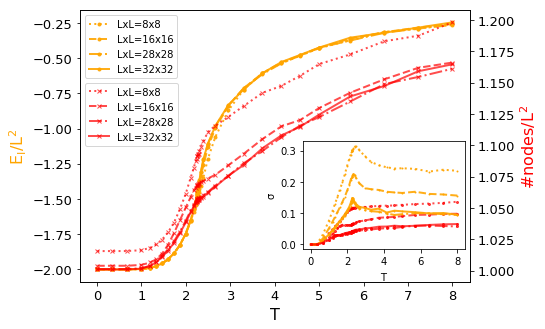

In [8]:
save = False
fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(1,1,1); ax2 = ax1.twinx()
ax1.set_xlabel('$\mathrm{T}$',fontsize=16)
ax1.set_ylabel('$\mathrm{E_I/L^2}$', fontsize=16, color='orange')
ax2.set_ylabel('#nodes/$\mathrm{L^2}$', fontsize=16, color='r')
ax1.tick_params(axis='both', which='both', labelsize=13)
ax2.tick_params(axis='both', which='both', labelsize=13)

ls = [':', '--', '-.', '-'] #color=cm.viridis(i*70)
left, bottom, width, height = [0.569, 0.215, 0.32, 0.3]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.set_xlabel('$\mathrm{T}$',fontsize=10)
ax3.set_ylabel('$\mathrm{\sigma}$', fontsize=10)

for i,L in enumerate(scales):
    ax1.plot(temperatures, Len_data[i]/(L**2), marker='o', markersize=3, alpha=0.9, label='LxL=%dx%d'%(L,L), color='orange', 
             linestyle=ls[i], linewidth=2)
    #ax1.errorbar(temperatures, Len_data[i]/(L**2), yerr=Len_terr[i]/(L**2), alpha=0.2, color=cm.viridis(i*70), linestyle='')
    ax2.plot(temperatures, Lnng_data[i]/(L**2), marker='x',markersize=4, alpha=0.7, label='LxL=%dx%d'%(L,L), color='r', 
             linestyle=ls[i], linewidth=2)
    #ax2.errorbar(temperatures, Lnng_data[i], yerr=Lnng_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')
    ax3.plot(temperatures, Len_terr[i]/(L**2),  marker='o', markersize=1, alpha=0.9, label='%d x %d'%(L,L), color='orange', 
             linestyle=ls[i], linewidth=2)
    ax3.plot(temperatures, Lnng_terr[i]/(L**2),  marker='o', markersize=2, alpha=0.7, label='%d x %d'%(L,L), color='r', 
             linestyle=ls[i], linewidth=2)
#ymin, ymax = ax1.get_ylim(); ax2.set_ylim((ymin+3,ymin+3+abs(ymax-ymin)))
#print(ymax)
ax1.legend(loc='upper left'); 
ax2.legend(loc=(0.014,0.5))
#plt.tight_layout()

if save:
    plt.savefig('2D_L_E_nng_vs_T', bbox_inches='tight')

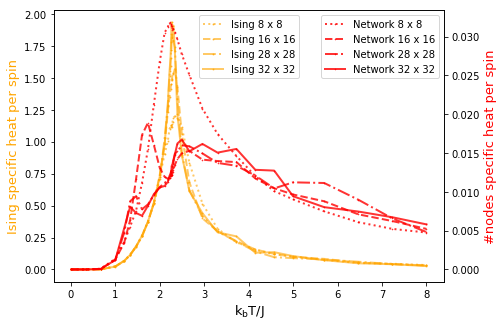

In [9]:
save = False

fig1 = plt.figure(figsize=(7,5))
ax11 = fig1.add_subplot(1,1,1); ax12 = ax11.twinx()
ax11.set_xlabel('$\mathrm{k_bT/J}$',fontsize=13)
ax11.set_ylabel('Ising specific heat per spin', fontsize=13, color='orange')
ax12.set_ylabel('#nodes specific heat per spin', fontsize=13, color='r')
ls = [':', '--', '-.', '-']

for i,L in enumerate(scales):
    ax11.plot(temperatures, L_CvEdata[i]/(L**2), marker='o', markersize=1, alpha=0.6, label='Ising %d x %d'%(L,L), color='orange',
            linestyle=ls[i], linewidth=2)
    ax12.plot(temperatures, L_Cv_nng_data[i]/(L**2), marker='x',markersize=1, alpha=0.8, label='Network %d x %d'%(L,L), color='r',
            linestyle=ls[i], linewidth=2)
ax11.legend(loc='upper center')
ax12.legend()

if save:
    plt.savefig('2D_L_CvE_Cv_nng_vs_T')

##### Energy ~ Allometric Scale

In [10]:
LdataALM = pickle.load(open('2Dfinite_size_scaling_dataALM.p', 'rb'))
Len_data = LdataALM['Len_data']; Len_err = LdataALM['Len_err']; Lalm_data = LdataALM['Lalm_data']
Lalm_err = LdataALM['Lalm_err']; L_CvEdata = LdataALM['L_CvEdata']; L_Cv_alm_data = LdataALM['L_Cv_alm_data']
temperatures = LdataALM['temperatures']; scales = LdataALM['scales']

In [11]:
Len_terr = uncorr_err(Len_err, LtauEdata); Lalm_terr = uncorr_err(Lalm_err, Ltau_alm_data)
print(Len_terr)
print(Lalm_terr)

[[  0.           0.           2.02845646   4.87930921   6.87358588
    8.36135376   9.73126281  11.2492249   12.74086876  14.35599165
   16.16670061  17.54128593  18.30307423  18.89856124  19.05738502
   19.18114202  19.1925431   19.1848902   19.29582492  19.41883413
   19.63312818  19.82152327  20.00359728  20.11284059  19.3337213
   18.05880848  16.91052663  16.22510113  15.81253005  15.55901708
   15.61954574  15.49054245  14.93928885  15.31591326  15.09751326]
 [  0.           0.           4.88322916  13.16108691  18.76030562
   22.54826661  26.51690704  30.47116036  34.73677825  39.14684001
   44.26617939  48.77234596  52.45092061  54.19331836  55.09997904
   55.57409435  55.69054302  56.13184964  56.19220153  56.81443831
   56.96703524  57.73779827  57.10269161  54.08676528  50.06324564
   46.16732673  45.29886748  44.6829202   43.21412116  42.65011665
   42.22823424  43.20912495  41.46232198  40.97457684  40.0774051 ]
 [  0.           0.           8.78885535  24.27544662  34.759

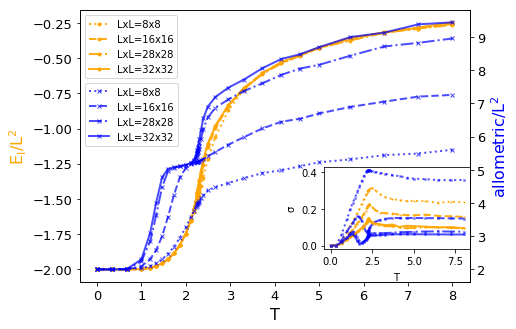

In [12]:
save = False

figALM = plt.figure(figsize=(7,5))
ax1 = figALM.add_subplot(1,1,1); ax2 = ax1.twinx()
ax1.set_xlabel('$\mathrm{T}$',fontsize=16)
ax1.set_ylabel('$\mathrm{E_I/L^2}$', fontsize=16, color='orange')
ax2.set_ylabel('allometric/$\mathrm{L^2}$', fontsize=16, color='b')
ax1.tick_params(axis='both', which='both', labelsize=13)
ax2.tick_params(axis='both', which='both', labelsize=13)
plt.subplots_adjust(hspace=4)
ls = [':', '--', '-.', '-']
left, bottom, width, height = [0.61, 0.215, 0.29, 0.23]
ax3 = figALM.add_axes([left, bottom, width, height])
ax3.set_xlabel('$\mathrm{T}$',fontsize=10)
ax3.set_ylabel('$\mathrm{\sigma}$', fontsize=10)


for i,L in enumerate(scales):
    ax1.plot(temperatures, Len_data[i]/(L**2), marker='o', markersize=3, alpha=0.9, label='LxL=%dx%d'%(L,L), color='orange',
            linestyle=ls[i], linewidth=2)
    #ax1.errorbar(temperatures, Len_data[i], yerr=Len_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')
    ax2.plot(temperatures, Lalm_data[i]/(L**2), marker='x',markersize=4, alpha=0.7, label='LxL=%dx%d'%(L,L), color='b',
            linestyle=ls[i], linewidth=2)
    #ax2.errorbar(temperatures, Lnng_data[i], yerr=Lnng_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')
    ax3.plot(temperatures, Len_terr[i]/(L**2),  marker='o', markersize=1, alpha=0.9, label='%d x %d'%(L,L), color='orange', 
             linestyle=ls[i], linewidth=2)
    ax3.plot(temperatures, Lalm_terr[i]/(L**2),  marker='x', markersize=2, alpha=0.7, label='%d x %d'%(L,L), color='b', 
             linestyle=ls[i], linewidth=2)
ax1.legend(loc='upper left')
ax2.legend(loc=(0.015,0.5))

if save:
    plt.savefig('2D_L_E_alm_vs_T', bbox_inches='tight')

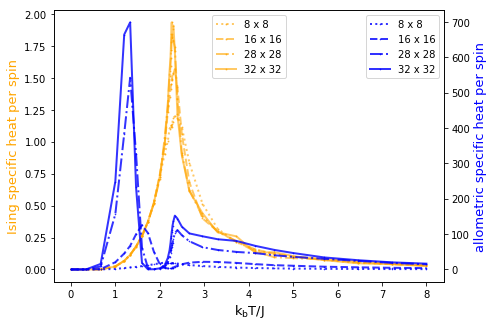

In [13]:
save = False

figALM1 = plt.figure(figsize=(7,5))
ax1 = figALM1.add_subplot(1,1,1); ax2 = ax1.twinx()
ax1.set_xlabel('$\mathrm{k_bT/J}$',fontsize=13)
ax1.set_ylabel('Ising specific heat per spin', fontsize=13, color='orange')
ax2.set_ylabel('allometric specific heat per spin', fontsize=13, color='b')
ls = [':', '--', '-.', '-']

for i,L in enumerate(scales):
    ax1.plot(temperatures, L_CvEdata[i]/(L**2), marker='o', markersize=1, alpha=0.6, label='%d x %d'%(L,L), color='orange', 
             linestyle=ls[i], linewidth=2)
    ax2.plot(temperatures, L_Cv_alm_data[i]/(L**2), marker='x',markersize=1, alpha=0.8, label='%d x %d'%(L,L), color='b',
             linestyle=ls[i], linewidth=2)
ax1.legend(loc='upper center')
ax2.legend()

if save:
    plt.savefig('2D_L_CvE_Cv_alm_vs_T')

##### Energy ~ Number of Nodes ~ Allometric Scale

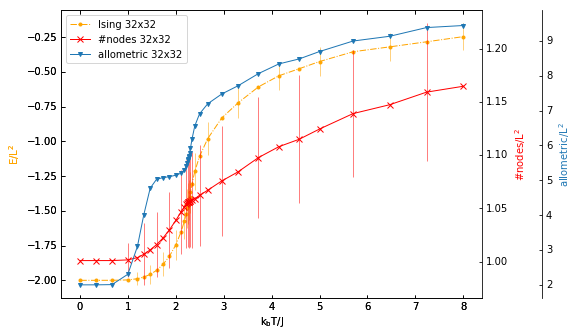

In [14]:
save = False
Lidx  = 3 # scale index
L = scales[Lidx]

from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes

fig = plt.figure(figsize=(9,5))

host = HostAxes(fig, [0.15, 0.1, 0.65, 0.8])
par1 = ParasiteAxes(host, sharex=host)
par2 = ParasiteAxes(host, sharex=host)
host.parasites.append(par1)
host.parasites.append(par2)

host.axis["right"].set_visible(False)
par1.axis["right"].set_visible(True)
par1.set_ylabel("Temperature")

par1.axis["right"].major_ticklabels.set_visible(True)
par1.axis["right"].label.set_visible(True)

par2.set_ylabel("allometric/$\mathrm{L^2}$")
offset = (60, 0)
new_axisline = par2._grid_helper.new_fixed_axis
par2.axis["right2"] = new_axisline(loc="right", axes=par2, offset=offset)

fig.add_axes(host)

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)

host.set_xlabel("$\mathrm{k_bT/J}$", fontsize=13)
host.set_ylabel("$\mathrm{E/L^2}$", fontsize=13)
par1.set_ylabel("#nodes/$\mathrm{L^2}$")

p1, = host.plot(temperatures, Len_data[Lidx]/(L**2), label="Ising %dx%d"%(L,L), marker='o', markersize=3, color='orange', linestyle='-.', linewidth=1)
p2, = par1.plot(temperatures, Lnng_data[Lidx]/(L**2), label="#nodes %dx%d"%(L,L), marker='x', markersize=6, color='r', linewidth=1)
p3, = par2.plot(temperatures, Lalm_data[Lidx]/(L**2), label="allometric %dx%d"%(L,L), marker='v', markersize=4, linewidth=1)

p1err = host.errorbar(temperatures, Len_data[Lidx]/(L**2), yerr=Len_terr[Lidx]/(L**2), fmt='none', color=p1.get_color(), elinewidth=0.5, 
                      errorevery=2)
p2err = par1.errorbar(temperatures[1:], Lnng_data[Lidx][1:]/(L**2), yerr=Lnng_terr[Lidx][1:]/(L**2), fmt='none', color=p2.get_color(), elinewidth=0.5, 
                      errorevery=2)
p3err = par2.errorbar(temperatures[2:], Lalm_data[Lidx][2:]/(L**2), yerr=Lalm_terr[Lidx][2:]/(L**2), fmt='none', color=p3.get_color(), elinewidth=0.5,
                      errorevery=2)

#par1.set_ylim(0, 4)
#par2.set_ylim(1, 65)
host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right2"].label.set_color(p3.get_color())

if save:
    plt.savefig('2D_E_nng_alm_vs_T_L=%d'%(L))

### Correlation

number of nodes

In [15]:
rData = [['','r(E,nng)']]

for i,L in enumerate(scales):
    cor = np.corrcoef(Len_data[i], Lnng_data[i])
    r = cor[0,1]
    row = []
    row.append('LxL = %dx%d'%(L,L)); row.append(r)
    rData.append(row)
        
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in rData)
       )
))

,"r(E,nng)"
LxL = 8x8,0.9737809940107719
LxL = 16x16,0.9648602271497783
LxL = 28x28,0.9708192324124982
LxL = 32x32,0.9716264145840153


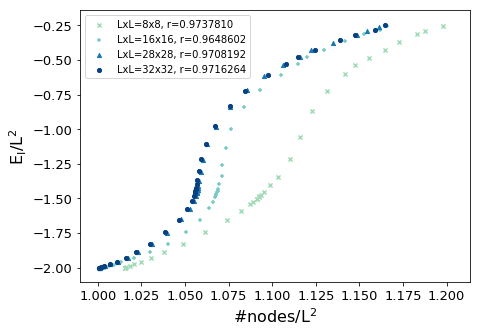

In [16]:
save = False

fig = plt.figure(figsize=(7,5))#; fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('#nodes/$\mathrm{L^2}$', fontsize=16)
ax1.set_ylabel('$\mathrm{E_I/L^2}$',fontsize=16)
ax1.tick_params(axis='both', which='both', labelsize=13)
ms = ['x', '+', '^', 'o']
mc = [cm.GnBu(100), cm.GnBu(130), cm.GnBu(210), cm.GnBu(290)]

for i,L in enumerate(scales):
    rm = np.corrcoef(Lnng_data[i], Len_data[i]) 
    r = rm[0,1]
    ax1.scatter(Lnng_data[i]/L**2, Len_data[i]/L**2, marker=ms[i], s=17, label='LxL=%dx%d, r=%.7f'%(L,L,r), c=mc[i], alpha=1)
    #ax1.plot(, , marker='o', markersize=2, alpha=0.6, label='%d'%(L), color='orange', 
     #        linestyle=ls[i], linewidth=0)

ax1.legend(loc='upper left'); 

if save:
    plt.savefig('2D_L_E_vs_nng', bbox_inches='tight')

allometric

In [17]:
rData = [['','r(E,alm)']]

for i,L in enumerate(scales):
    cor = np.corrcoef(Len_data[i], Lalm_data[i])
    r = cor[0,1]
    row = []
    row.append('LxL = %dx%d'%(L,L)); row.append(r)
    rData.append(row)
        
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in rData)
       )
))

,"r(E,alm)"
LxL = 8x8,0.9410771250155923
LxL = 16x16,0.8875828878432496
LxL = 28x28,0.9378875030396768
LxL = 32x32,0.9473484370269928


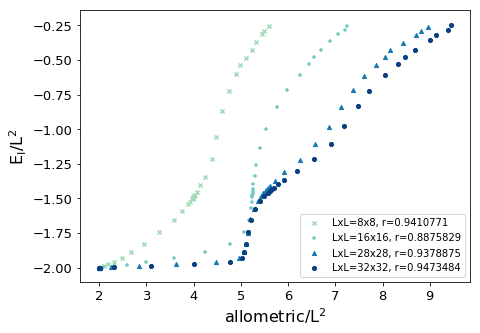

In [18]:
save = False

fig = plt.figure(figsize=(7,5))#; fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('allometric/$\mathrm{L^2}$', fontsize=16)
ax1.set_ylabel('$\mathrm{E_I/L^2}$',fontsize=16)
ax1.tick_params(axis='both', which='both', labelsize=13)
ms = ['x', '+', '^', 'o']
mc = [cm.GnBu(100), cm.GnBu(130), cm.GnBu(210), cm.GnBu(290)]

for i,L in enumerate(scales):
    rm = np.corrcoef(Lalm_data[i], Len_data[i]) 
    r = rm[0,1]
    ax1.scatter(Lalm_data[i]/L**2, Len_data[i]/L**2, marker=ms[i], s=17, label='LxL=%dx%d, r=%.7f'%(L,L,r), c=mc[i])
    #ax1.plot(, , marker='o', markersize=2, alpha=0.6, label='%d'%(L), color='orange', 
     #        linestyle=ls[i], linewidth=0)

ax1.legend(loc='lower right'); 

if save:
    plt.savefig('2D_L_E_vs_alm', bbox_inches='tight')